# "Bubbles"

### Reproduction "Bifurcation structure of bubble oscillations" Partliz, Englisch, Sheffczyk, Lauterborn (1990)


In [2]:
import pickle

from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool 

import time

import numpy as np
import scipy as sp
from scipy import integrate
from scipy import pi, sin, cos

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
def f(t, x,   Rn, v, Ps, alpha, beta, gamma, rho=998, c=1500, Pstat=100000, Pv=2330, sigma=0.0725, mu=0.001):
    # smoothing parameters
#     alpha = 1
#     beta = 2
#     gamma = 0.001
    
    delta = alpha/gamma
    
    v0 = alpha*beta/(gamma*Rn)
    
    y = x[1]/x[0]
    z = (1/beta)*np.log(x[0]/alpha)
    
    p1 = 2*np.pi*(v/v0)
    p2 = Ps/((delta**2)*beta*rho)
    p3 = -3/(2*beta)
    p4 = delta/(2*beta*c)
    p5 = (1/(rho*beta*(delta**2)))*(Pstat - Pv + (2*sigma/Rn))
    p6 = (3*delta/c)*p5
    p7 = 2*sigma/((delta**2)*beta*rho*Rn)
    p8 = 4*mu/(delta*beta*rho*Rn)
    p9 = delta/c
    p10 = (Pstat - Pv)/((delta**2)*rho*beta)
    p11 = 2*np.pi*v*Ps*Rn/((delta**2)*beta*rho*c)
    p12 = 4*mu/(rho*c*Rn)
    
    return (x[1],
            
            x[0]*(y**2 + (((p3 + p4*y)*(y**2) + (p5 - p6*y)*(z**(-4))
                          - (p7 + p8*y)*(z**-1) - (1 + p9*y)*(p10 + p2*sin(x[2])) - p11*z*cos(x[2])
                         )/((1 - p9*y)*z + p12))
                 ),
            
            p1
           )

f(0, [5,5,5],  0.001, 200, 1000,  1, 2, 0.001)

(5, -5.876984656657243, 0.0006283185307179586)

In [4]:
def compute_sol(Rn, v, Ps, alpha, beta, gamma, rtol=1e-9, atol=1e-9, tend=100000):
    # Do ICs
#     alpha = 1
#     beta = 2
#     gamma = 0.001

    #Rn = 10e-6
    #v = 70000
    #Ps = 80000

    R = 11e-6
    Ui = 10

    v0 = alpha*beta/(gamma*Rn)

    x10 = alpha*np.exp(beta*R/Rn)
    x20 = (gamma*Ui*np.exp(beta*R/Rn))
    x30 = 1

    t_ = (0, tend)
    ode_sol = integrate.solve_ivp(
        fun=lambda t, y: f(t, y, Rn, v, Ps, alpha, beta, gamma), 
        t_span=t_, y0=[x10, x20, x30], 
        rtol=rtol, atol=1e-9, method='RK45')
    
    return ode_sol, v0

25423


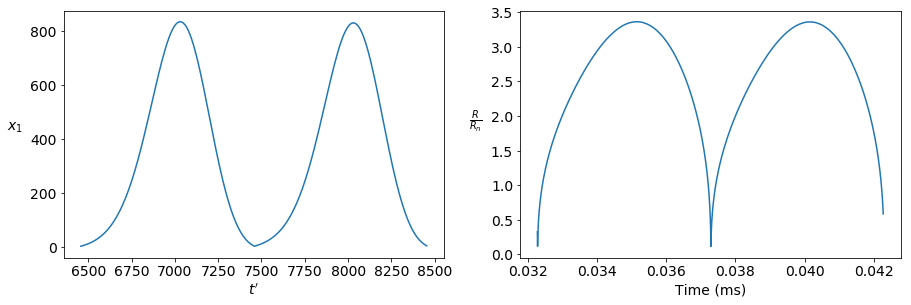

In [5]:
alpha = 1
beta = 2
gamma = 0.001

Rn = 10e-6
v = 200e3
Ps = 150e3

os, v0 = compute_sol(Rn, v, Ps, alpha, beta, gamma)

print(len(os.t))
sta = 1500
end = 2000
tl = os.t[sta:end]
x1 = os.y[0][sta:end]
x2 = os.y[1][sta:end]

plt.figure(figsize=(15, 10))
matplotlib.rcParams.update({"font.size": 14})
plt.subplot(221)
plt.xlabel(r"$t'$")
plt.ylabel(r"$x_1$", rotation=0, labelpad=15)
plt.plot(tl, x1)

plt.subplot(222)
plt.plot( (tl/v0)*1000, ((Rn/beta)*np.log(x1/alpha))/Rn )
plt.xlabel("Time (ms)")
plt.ylabel(r"$\frac{R}{R_n}$", rotation=0, labelpad=15)
plt.show()

# plt.subplot(223)
# plt.plot( ((Rn/beta)*np.log(x1/alpha))/Rn, (alpha/gamma)*(x2/x1))
# plt.show()

26175
0.0 0.0005
26102
0.0 0.0005
24362
0.0 0.0005
22544
0.0 0.0005
19855
0.0 0.0005


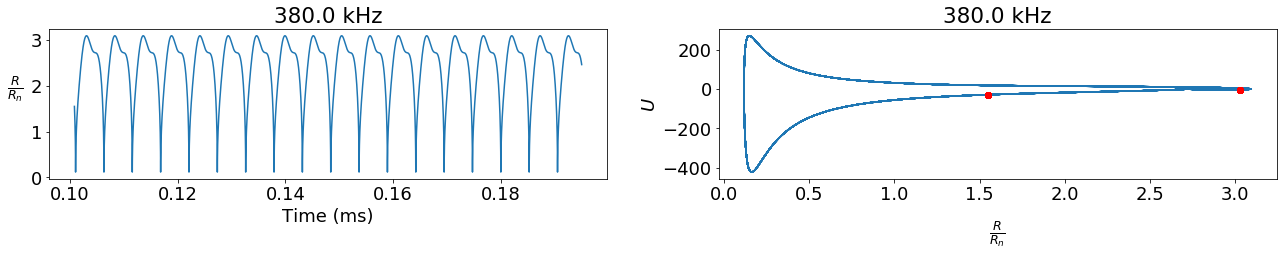

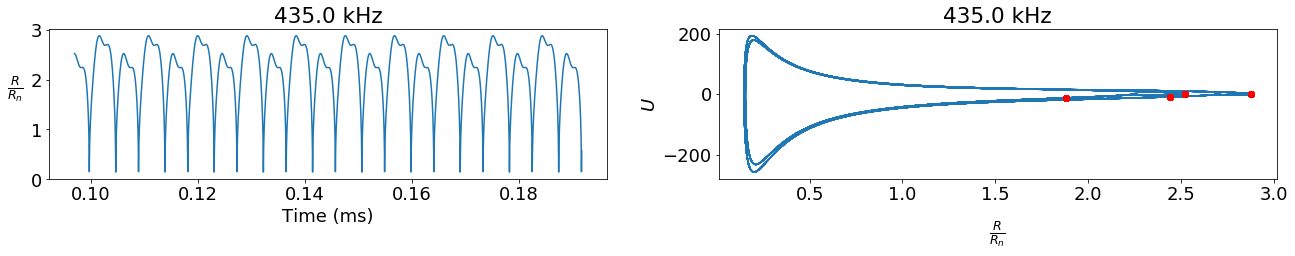

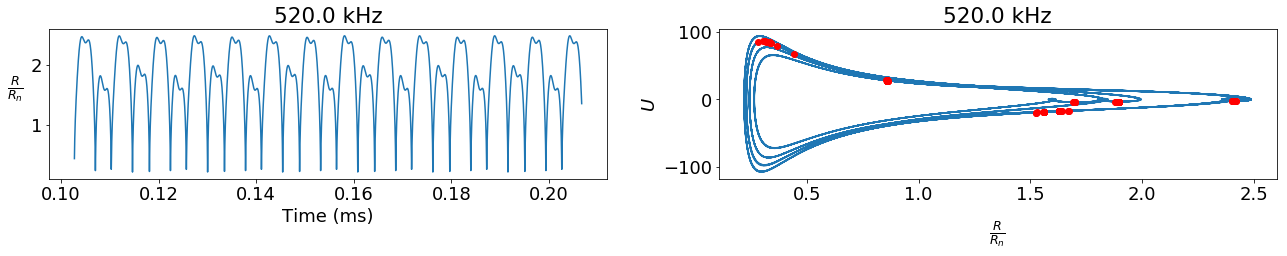

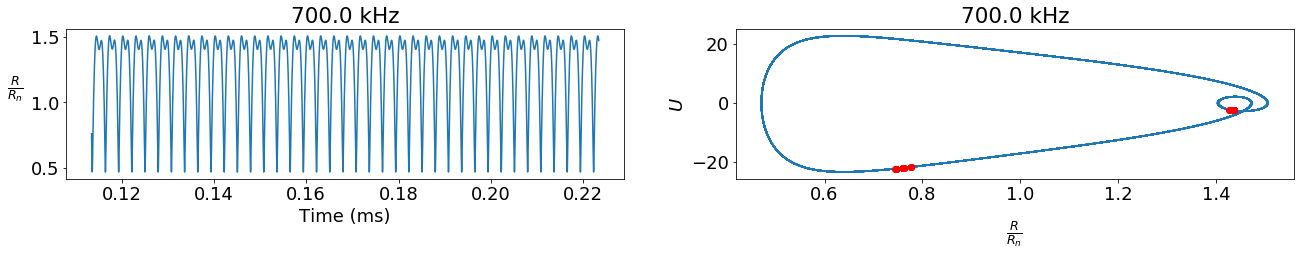

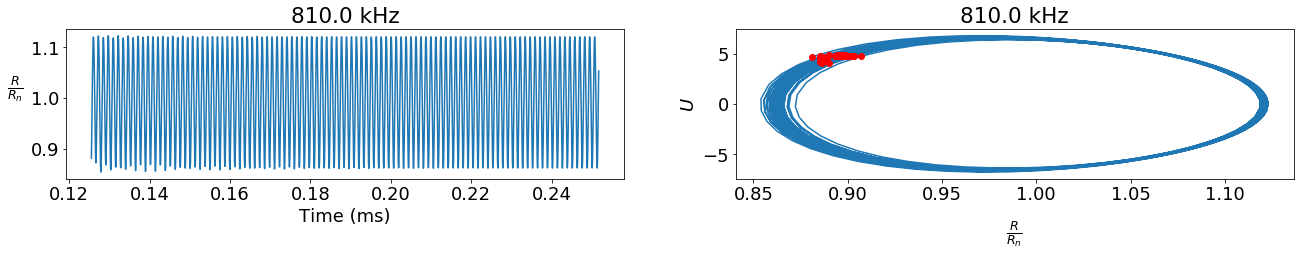

In [6]:
n = 1

for v in [380e3, 435e3, 520e3, 700e3, 810e3]:
    alpha = 1
    beta = 2
    gamma = 0.001

    Rn = 10e-6
    Ps = 272e3

    os, v0 = compute_sol(Rn, v, Ps, alpha, beta, gamma)

    print(len(os.t))
    print(os.t[0], os.t[-1]/v0)
    sta = 5000
    end = 10000
    tl = os.t[sta:end]
    x1 = os.y[0][sta:end]
    x2 = os.y[1][sta:end]

    plt.figure(figsize=(22, 16))
    matplotlib.rcParams.update({"font.size": 18})
    plt.subplot(5, 2, 2*n - 1)
    plt.plot( (tl/v0)*1000, ((Rn/beta)*np.log(x1/alpha))/Rn )
    plt.xlabel("Time (ms)")
    plt.ylabel(r"$\frac{R}{R_n}$", rotation=0, labelpad=15)
    plt.title("{} kHz".format(v/1000))

    plt.subplot(5, 2, 2*n)
    plt.plot( ((Rn/beta)*np.log(x1/alpha))/Rn, (alpha/gamma)*(x2/x1) )
    plt.xlabel(r"$\frac{R}{R_n}$", rotation=0, labelpad=15)
    plt.ylabel(r"$U$")
    plt.title("{} kHz".format(v/1000))

    for tstab in np.arange(os.t[5000]/v0, os.t[-1]/v0, 1/v):
        tarr = (os.t/v0)
        idx = (np.abs(tarr - tstab)).argmin()
        plt.plot( ((Rn/beta)*np.log(os.y[0][idx]/alpha))/Rn, (alpha/gamma)*(os.y[1][idx]/os.y[0][idx]), 'ro' )
#         plt.plot( tarr[idx]*1000, (alpha/gamma)*(x2[idx]/x1[idx]), 'ro' )
        
    n += 1

plt.show()

In [10]:
len(np.arange(os.t[500]/v0, os.t[-1]/v0, 1/207e3))

103486

23490
0.0 0.0005


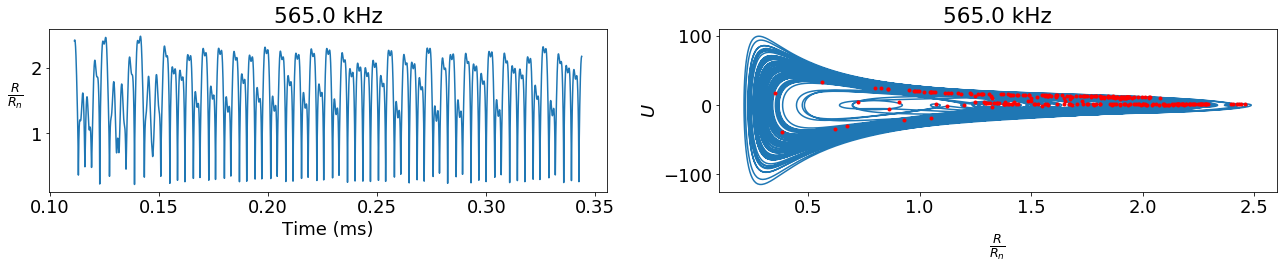

In [8]:
v = 565e3

alpha = 1
beta = 2
gamma = 0.001

Rn = 10e-6
Ps = 290e3

os, v0 = compute_sol(Rn, v, Ps, alpha, beta, gamma)

print(len(os.t))
print(os.t[0], os.t[-1]/v0)
sta = 5000
end = 16000
tl = os.t[sta:end]
x1 = os.y[0][sta:end]
x2 = os.y[1][sta:end]

plt.figure(figsize=(22, 3))
matplotlib.rcParams.update({"font.size": 18})
plt.subplot(1, 2, 1)
plt.plot( (tl/v0)*1000, ((Rn/beta)*np.log(x1/alpha))/Rn )
plt.xlabel("Time (ms)")
plt.ylabel(r"$\frac{R}{R_n}$", rotation=0, labelpad=15)
plt.title("{} kHz".format(v/1000))

plt.subplot(1, 2, 2)
plt.plot( ((Rn/beta)*np.log(x1/alpha))/Rn, (alpha/gamma)*(x2/x1) )
plt.xlabel(r"$\frac{R}{R_n}$", rotation=0, labelpad=15)
plt.ylabel(r"$U$")
plt.title("{} kHz".format(v/1000))

for tstab in np.arange(os.t[2000]/v0, os.t[-1]/v0, 1/v):
    tarr = (os.t/v0)
    idx = (np.abs(tarr - tstab)).argmin()
    plt.plot( ((Rn/beta)*np.log(os.y[0][idx]/alpha))/Rn, (alpha/gamma)*(os.y[1][idx]/os.y[0][idx]), 'r.' )
#         plt.plot( tarr[idx]*1000, (alpha/gamma)*(x2[idx]/x1[idx]), 'ro' )

n += 1

In [9]:
v = 600e3

alpha = 1
beta = 2
gamma = 0.001

Rn = 10e-6
Ps = 300e3

os, v0 = compute_sol(Rn, v, Ps, alpha, beta, gamma, rtol=1e-4, atol=1e-4, tend=1e8)

print(len(os.t))
print(os.t[0], os.t[-1]/v0)
sta = 5000
end = 16000
tl = os.t[sta:end]
x1 = os.y[0][sta:end]
x2 = os.y[1][sta:end]

plt.figure(figsize=(15, 15))
# matplotlib.rcParams.update({"font.size": 18})
# plt.subplot(1, 2, 1)
# plt.plot( (tl/v0)*1000, ((Rn/beta)*np.log(x1/alpha))/Rn )
# plt.xlabel("Time (ms)")
# plt.ylabel(r"$\frac{R}{R_n}$", rotation=0, labelpad=15)
# plt.title("{} kHz".format(v/1000))

# plt.plot( ((Rn/beta)*np.log(x1/alpha))/Rn, (alpha/gamma)*(x2/x1) )
# plt.xlabel(r"$\frac{R}{R_n}$", rotation=0, labelpad=15)
# plt.ylabel(r"$U$")
# plt.title("{} kHz".format(v/1000))

for tstab in np.arange(os.t[2000]/v0, os.t[-1]/v0, 1/v):
    tarr = (os.t/v0)
    idx = (np.abs(tarr - tstab)).argmin()
    plt.plot( ((Rn/beta)*np.log(os.y[0][idx]/alpha))/Rn, (alpha/gamma)*(os.y[1][idx]/os.y[0][idx]), 'b.', ms=1.0)
    
plt.xlabel(r"$\frac{R_p}{R_n}$", rotation=0, labelpad=15)
plt.ylabel(r"$U_p$")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/scipy/integrate/_ivp/rk.py:140: RuntimeWarning: invalid value encountered in maximum
  scale = atol + np.maximum(np.abs(y), np.abs(y_new)) * rtol


3512162
0.0 0.5


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [11]:
plt.figure(figsize=(15, 15))
xpt = list()
ypt = list()
for tstab in np.arange(os.t[2000]/v0, os.t[-1]/v0, 1/v):
    tarr = (os.t/v0)
    idx = (np.abs(tarr - tstab)).argmin()
    xpt.append( ((Rn/beta)*np.log(os.y[0][idx]/alpha))/Rn )
    ypt.append( (alpha/gamma)*(os.y[1][idx]/os.y[0][idx]) )
#     plt.plot( ((Rn/beta)*np.log(os.y[0][idx]/alpha))/Rn, (alpha/gamma)*(os.y[1][idx]/os.y[0][idx]), 'b.', ms=1.0)

plt.scatter(xpt, ypt, 'b.', s=1.0)
plt.xlabel(r"$\frac{R_p}{R_n}$", rotation=0, labelpad=15)
plt.ylabel(r"$U_p$")
plt.show()

KeyboardInterrupt: 

<Figure size 1080x1080 with 0 Axes>